# The FeatureSpace Intern Recruitment Challenge: Compromise point detection

In [82]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib
from matplotlib import pyplot as plt

## Count fraud rate of each merchant on each day

In [188]:
# read raw data
raw_data = pd.read_csv("input.csv").iloc[:,[1, 2, 3]]

In [195]:
def get_fraud_rate(x):
    fraud_rate = (x==True).sum() / float(len(x))
    return fraud_rate
    if fraud_rate > 0.05:
        return fraud_rate
    else:
        return 0

In [196]:
# count fraud rate for each merchant on each day
group = raw_data.groupby(by=['date', 'merchant'])['fraud']
group = group.apply(get_fraud_rate)

# convert the Hierachy index back to normal index
fraud_rate = df(columns=['date', 'merchant', 'fraud_rate'])
for row in group.items():
    fraud_rate.loc[len(fraud_rate)] = [row[0][0], row[0][1], row[1]]

## Get names of merchants

In [197]:
merchant_set = set()
for merchant in raw_data['merchant']:
    if merchant not in merchant_set:
        merchant_set.add(merchant)

## Plot out fraud rate against date for each merchant

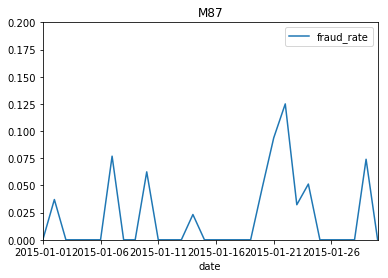

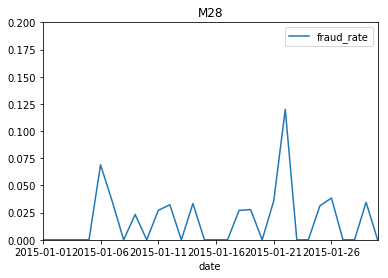

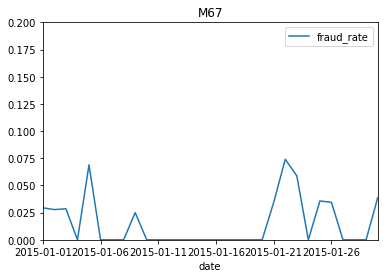

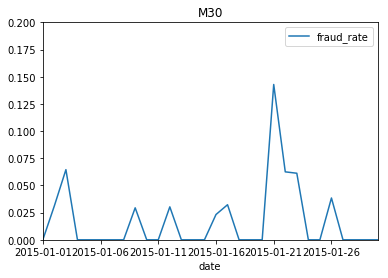

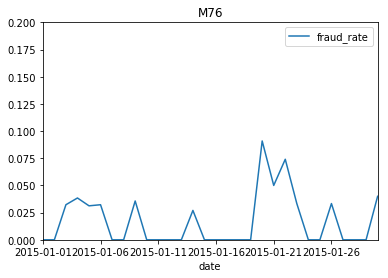

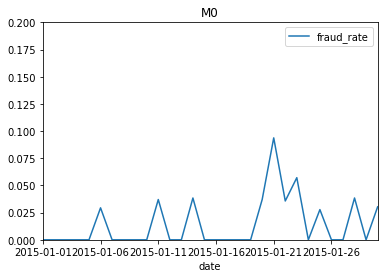

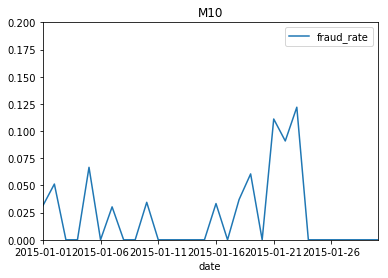

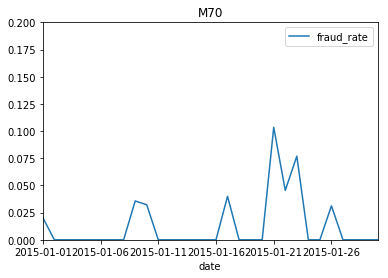

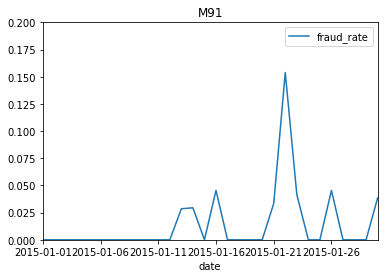

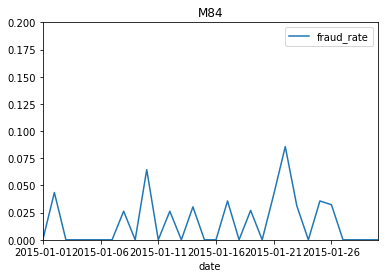

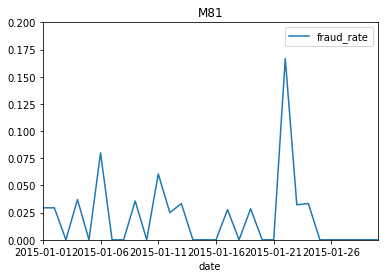

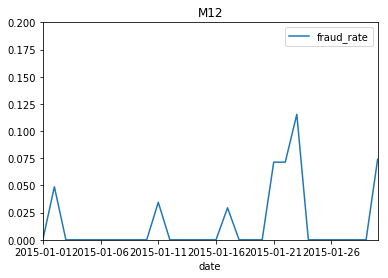

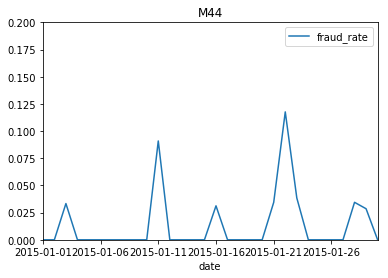

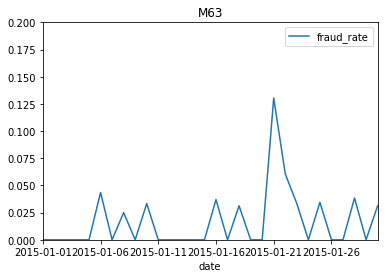

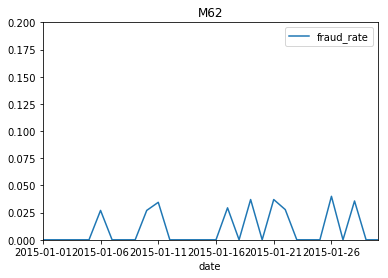

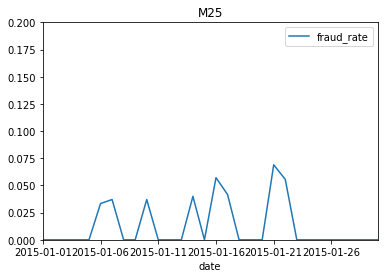

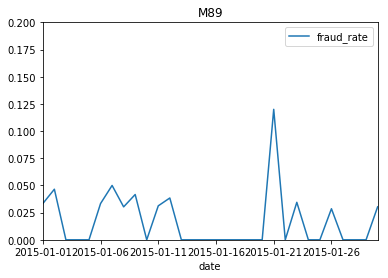

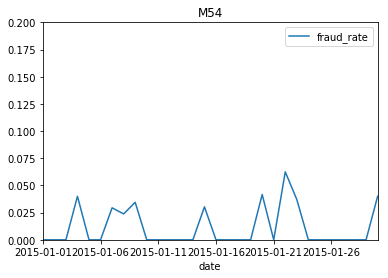

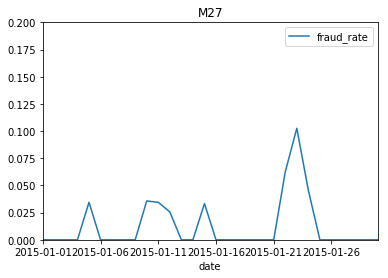

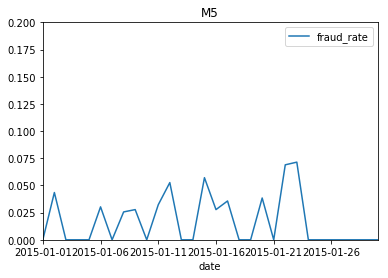

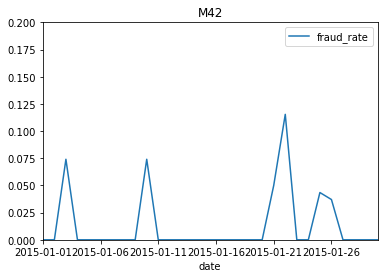

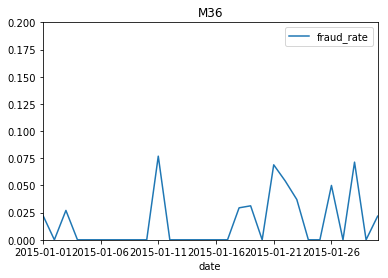

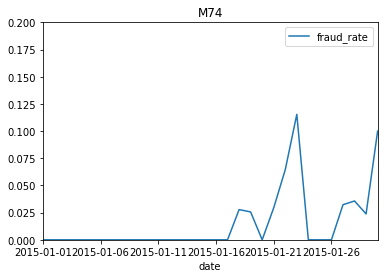

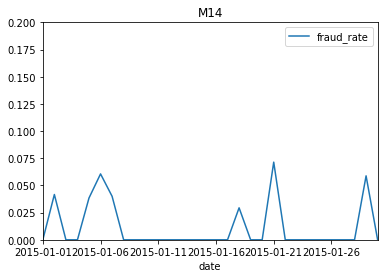

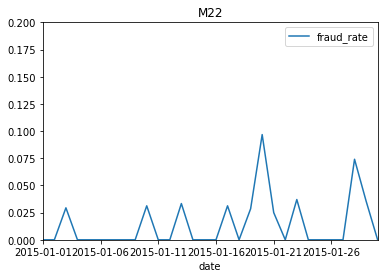

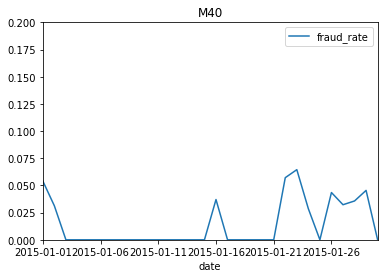

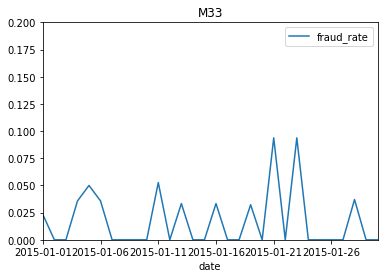

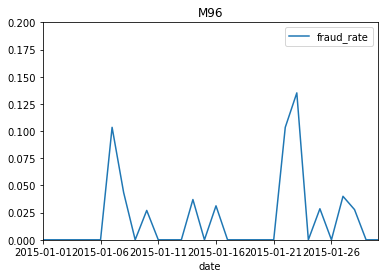

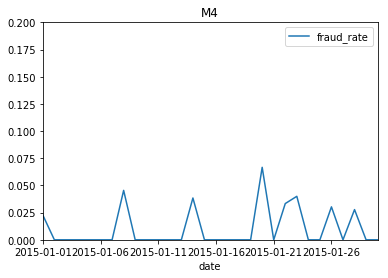

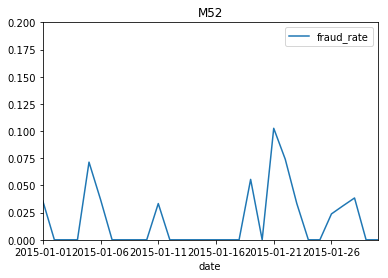

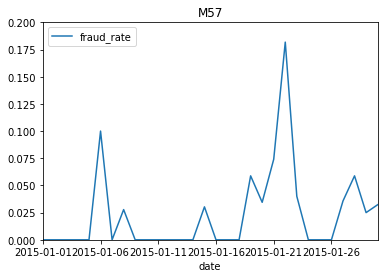

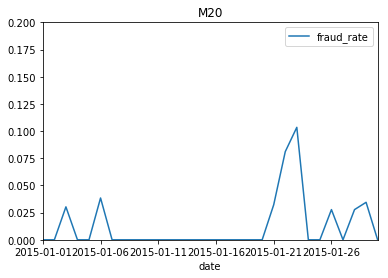

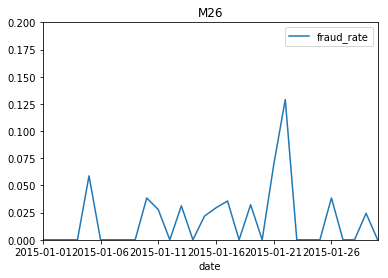

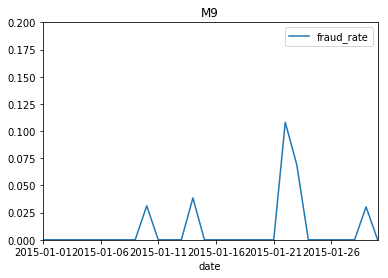

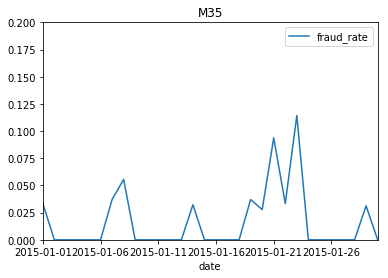

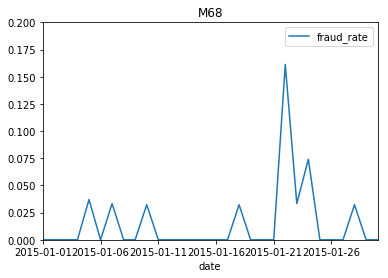

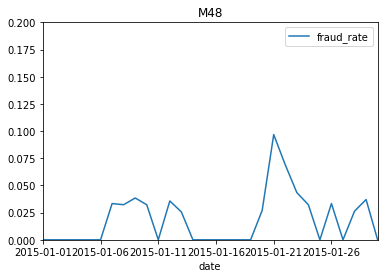

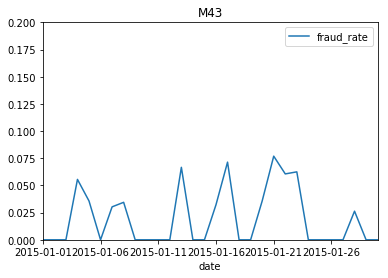

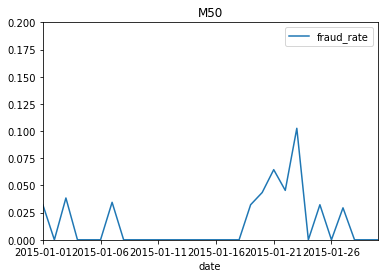

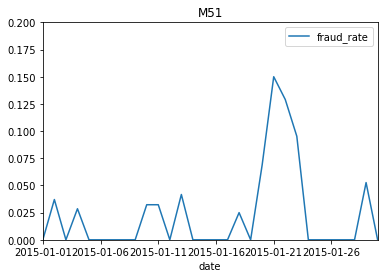

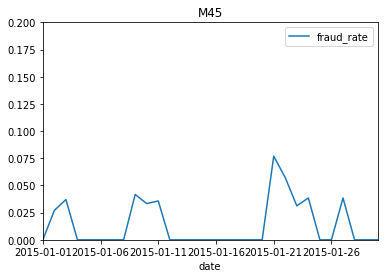

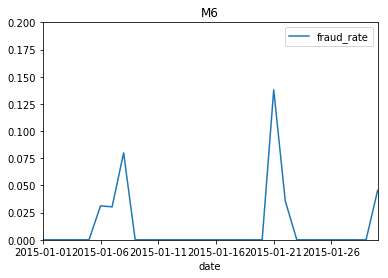

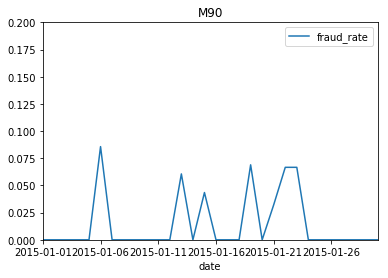

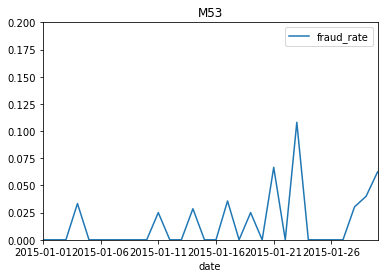

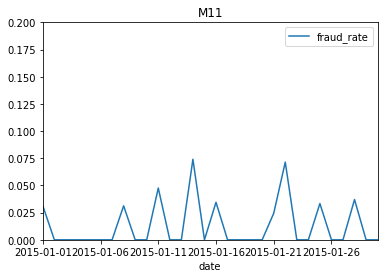

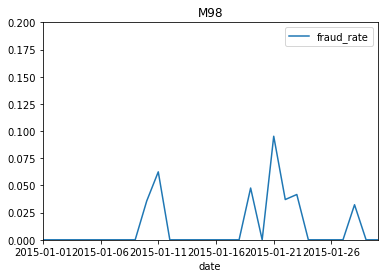

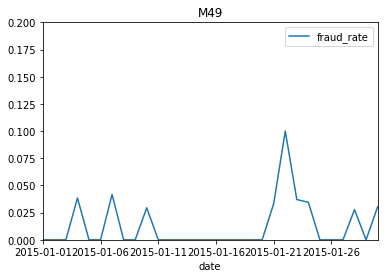

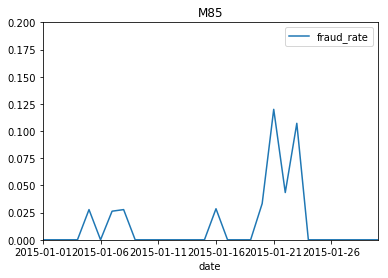

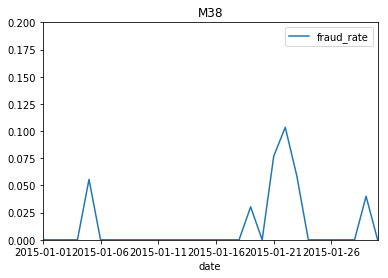

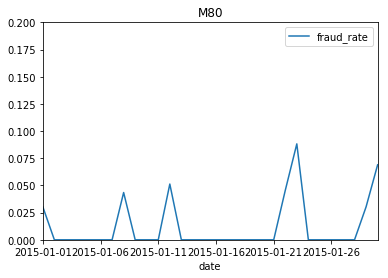

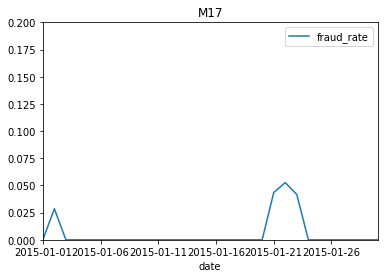

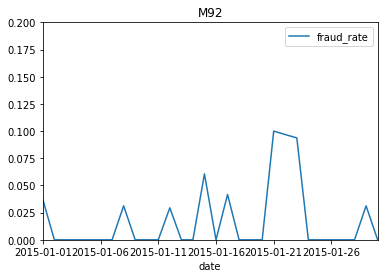

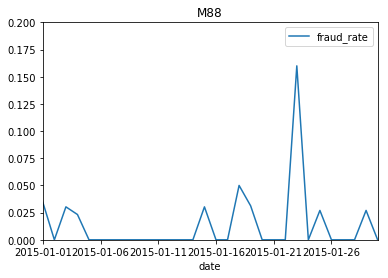

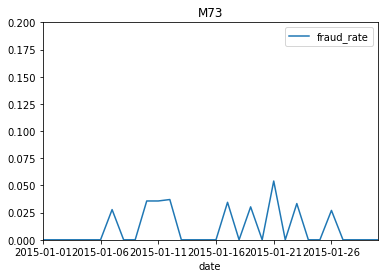

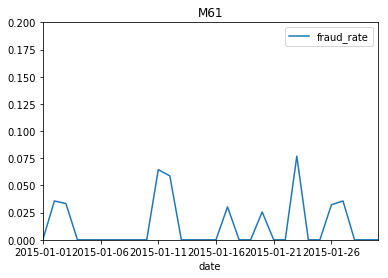

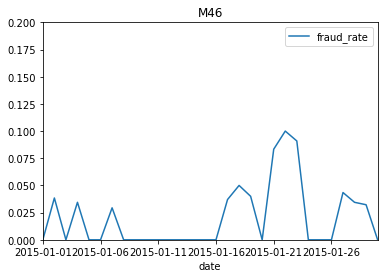

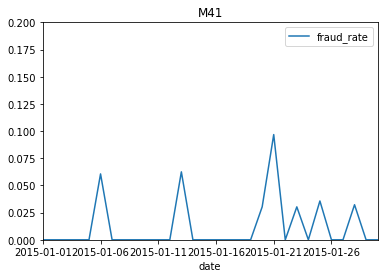

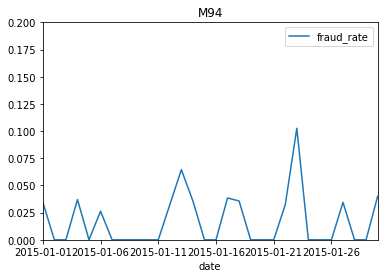

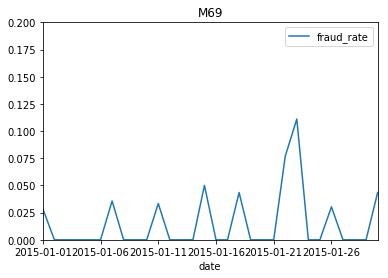

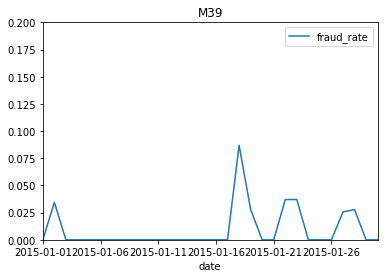

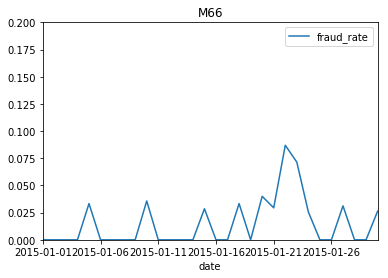

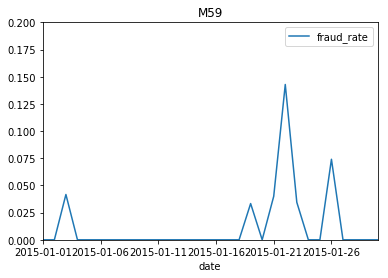

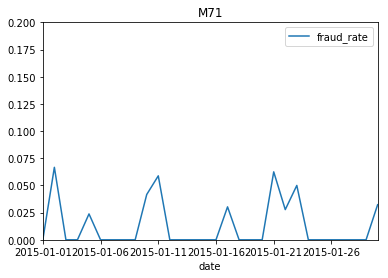

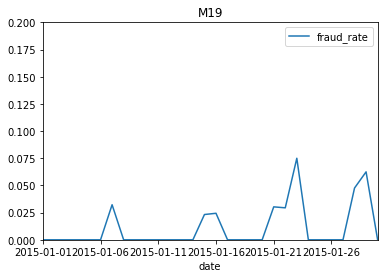

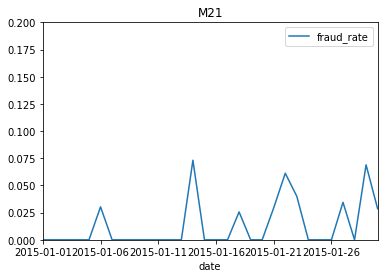

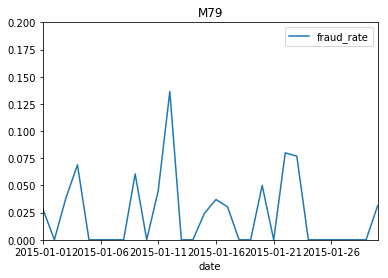

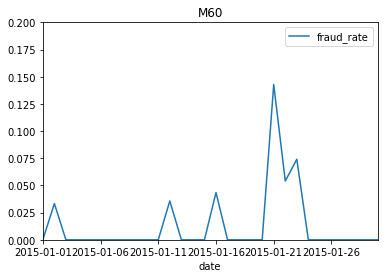

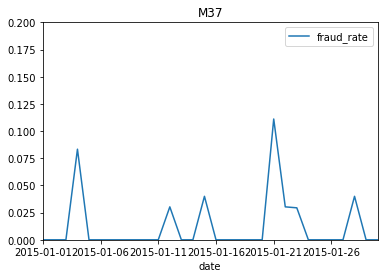

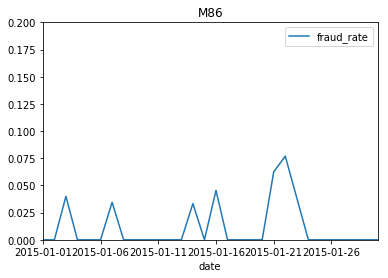

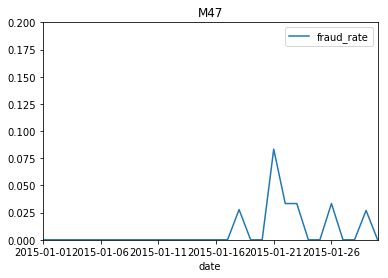

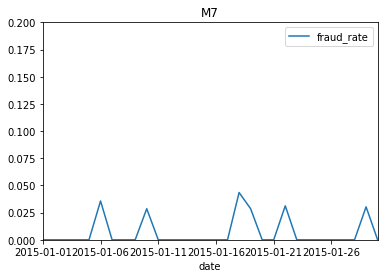

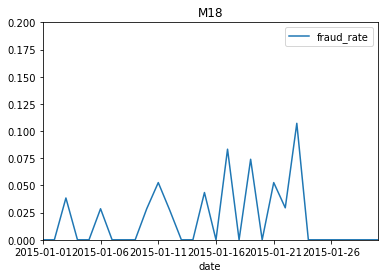

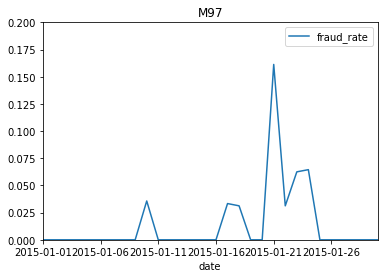

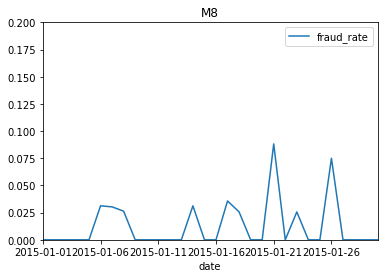

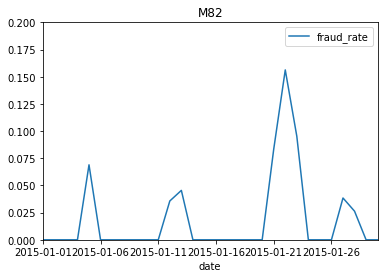

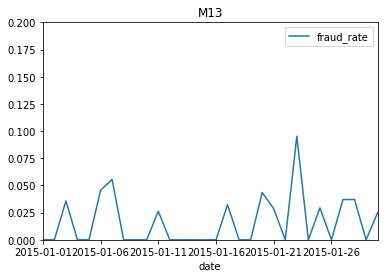

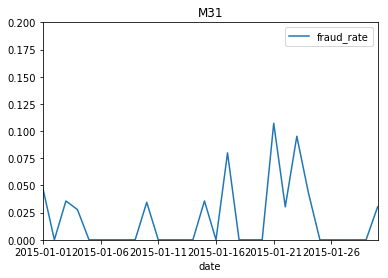

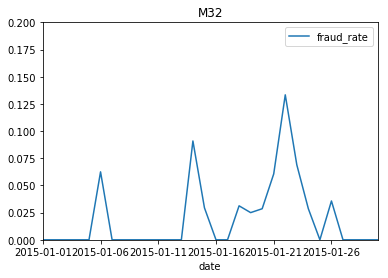

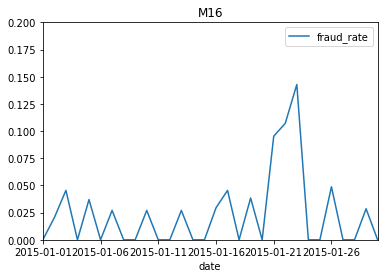

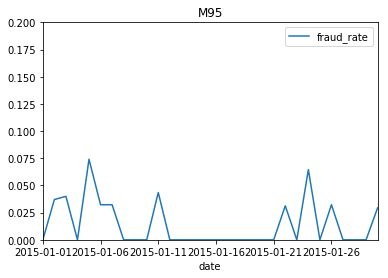

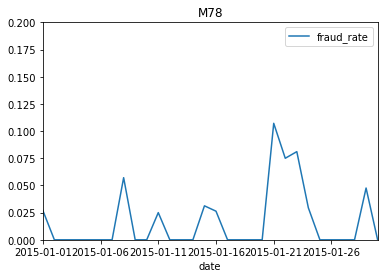

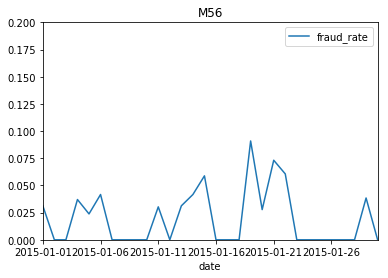

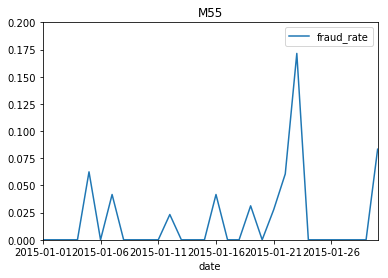

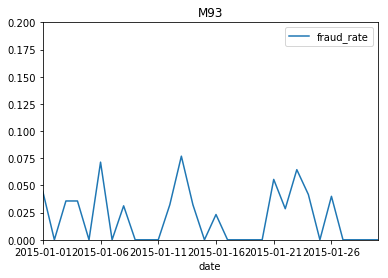

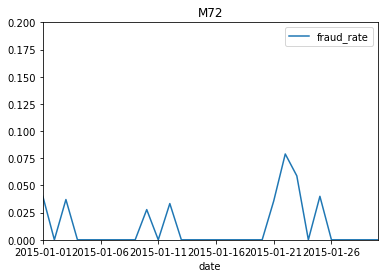

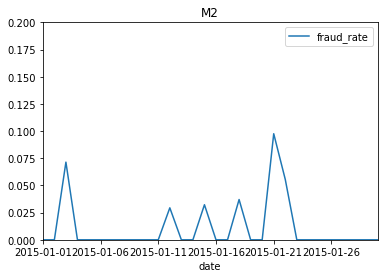

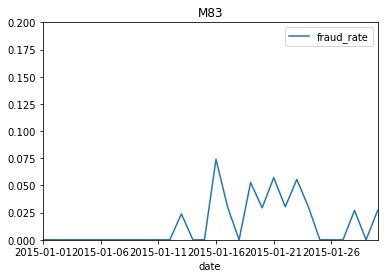

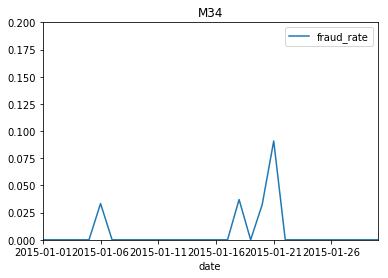

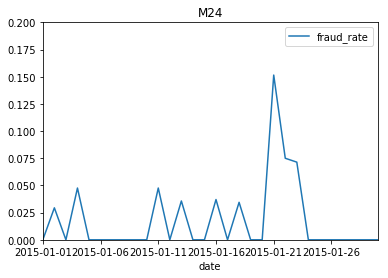

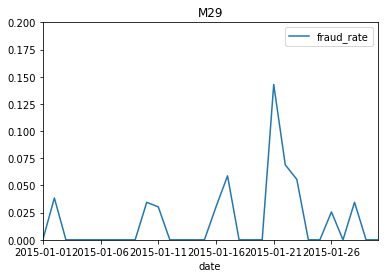

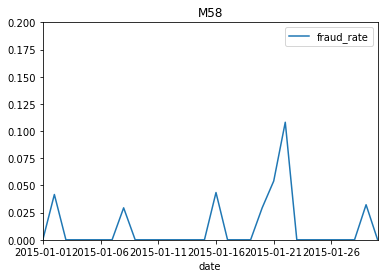

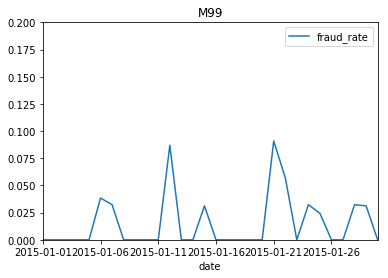

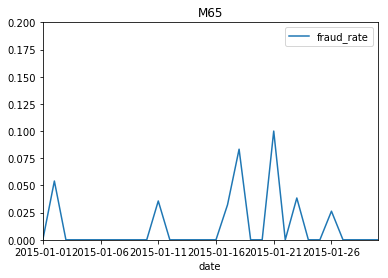

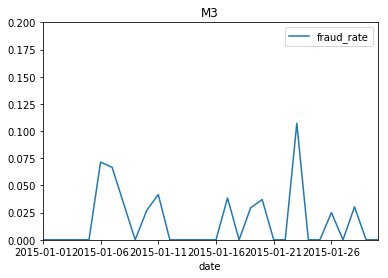

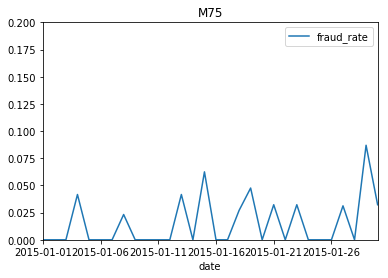

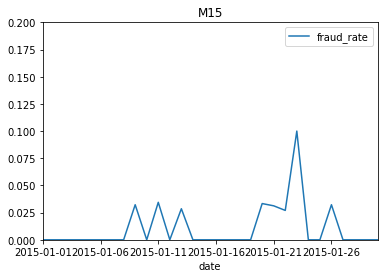

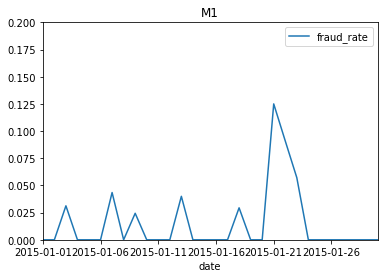

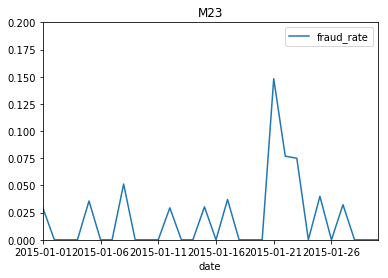

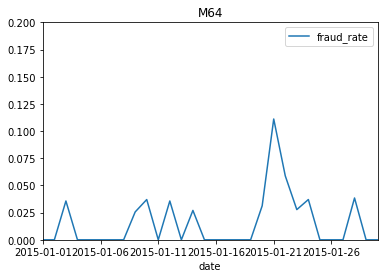

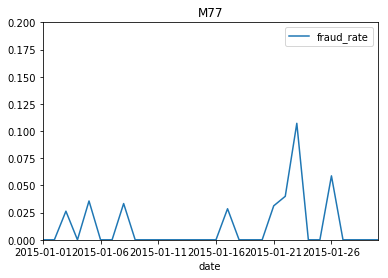

In [205]:
for merchant in merchant_set:
    temp_df = fraud_rate[fraud_rate.merchant==merchant]
    #temp_df.cumsum().plot(x='date', y='fraud_rate', title=merchant, ylim=(0, 1))
    temp_df.plot(x='date', y='fraud_rate', title=merchant, ylim=(0, 0.2))
    plt.show()